<h1>PYTHON ZOMATO PROJECT</h1> 
<h3>I. DATA COLLECTION</h3>

This project uses open source data from website Kagle.com. 

The data used in the project is about various restaurants from different parts of the world that are registered on the site zomato.com. Zomato is an online restaurant search and discovery platform that operates in about 24 countries in the world. 
The data contains Zomato's restaraunts' ratings, restaraunts' locations,  the cuisines offered, the number of votes, delivery options, etc. There are about 9552 rows and 21 coloumns in the data set.

<h3> II. DATA DESCRIPTION & EXPLORATORY DATA ANALYSIS </h3>

In this step, I analyze the data and find the correlation between different variables. There are 26 cols namely Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking, Has Online delivery,Is delivering now,Switch to order menu,Price range,	Aggregate rating,Rating color,Rating text, and Votes.

For analyzing the data, I create scatter plots to determine the relationship between a country and its rating. I also plot histograms for finding the range of average rating and the number of votes.

<h3>Import the data</h3>

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/vineet.khattar/Downloads/zomato.csv/zomato.csv',encoding = "ISO-8859-1")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


<h3>Create dummy variables from the data</h3> 

In this step I create dummy variables, namely for the following variables:
'Has Online delivery','Has Table booking','Is delivering now',and 'Country Code'

In [109]:
dummy1 = pd.get_dummies(df['Has Online delivery'])
df = pd.concat([df,dummy1],axis =1)
df.rename(columns={'No':'noonlinedelivery'}, inplace=True)
df.rename(columns={'Yes':'yesonlinedelivery'}, inplace=True)


In [110]:
dummy2 = pd.get_dummies(df['Has Table booking'])
df = pd.concat([df,dummy2],axis =1)
df.rename(columns={'No':'Hastable'}, inplace=True)
df.rename(columns={'Yes':'notable'}, inplace=True)


In [111]:
dummy3 = pd.get_dummies(df['Is delivering now'])
df = pd.concat([df,dummy3],axis =1)
df.rename(columns={'No':'yesdelivery'}, inplace=True)
df.rename(columns={'Yes':'nodelivery'}, inplace=True)


In [112]:
dummy5 = pd.get_dummies(df['Country Code'])
df = pd.concat([df,dummy5],axis =1)
df.rename(columns={162:'Botswana'}, inplace=True)
df.rename(columns={30:'Brazil'}, inplace=True)
df.rename(columns={216:'United States'}, inplace=True)
df.rename(columns={14:'Australia'}, inplace=True)
df.rename(columns={37:'Canada'}, inplace=True)
df.rename(columns={215:'United Kingdom'}, inplace=True)
df.rename(columns={214:'UAE'}, inplace=True)
df.rename(columns={208:'Turkey'}, inplace=True)
df.rename(columns={191:'Sri Lanka'}, inplace=True)
df.rename(columns={184:'Singapore'}, inplace=True)
df.rename(columns={189:'South Africa'}, inplace=True)
df.rename(columns={166:'Qatar'}, inplace=True)
df.rename(columns={162:'Philippines'}, inplace=True)
df.rename(columns={14:'India'}, inplace=True)
df.rename(columns={1:'India'}, inplace=True)
df.rename(columns={94:'Indonesia'}, inplace=True)
df.rename(columns={148:'148'}, inplace=True)


In [113]:
dummy6 = pd.get_dummies(df['Has Table booking'])
df = pd.concat([df,dummy6],axis =1)
df.rename(columns={'No':'yesorder'}, inplace=True)
df.rename(columns={'Yes':'noorder'}, inplace=True)


<h3>Data Analysis</h3>

In [16]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,noonlinedelivery,yesonlinedelivery,...,Qatar,Singapore,South Africa,Sri Lanka,Turkey,UAE,United Kingdom,United States,yesorder,noorder
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,...,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748,0.743378,0.256622,...,0.002094,0.002094,0.006282,0.002094,0.003560,0.006282,0.008376,0.045440,0.878756,0.121244
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145,0.436792,0.436792,...,0.045715,0.045715,0.079014,0.045715,0.059561,0.079014,0.091142,0.208279,0.326428,0.326428
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3>CHECK MISSING VALUES</h3>

In [59]:
df.isnull().any()

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
noonlinedelivery        False
yesonlinedelivery       False
Hastable                False
notable                 False
yesdelivery             False
nodelivery              False
India                   False
Australia               False
Brazil                  False
Canada                  False
Indonesia               False
148                     False
Botswana  

From the above we can see that there are no missing values in any of the coloumn except cuisines. I am not including cuisines in my model. Hence, I should not have any problem

<h3>DATAFRAME INFORMATION</h3>


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 50 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

The above cell provides information on all the coloumns in the dataframe

<h3>DATA DESCRIPTION</h3>

In [94]:
df.shape

(9551, 50)

In [92]:
list(df)

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'noonlinedelivery',
 'yesonlinedelivery',
 'Hastable',
 'notable',
 'yesdelivery',
 'nodelivery',
 'India',
 'Australia',
 'Brazil',
 'Canada',
 'Indonesia',
 '148',
 'Botswana',
 'Qatar',
 'Singapore',
 'South Africa',
 'Sri Lanka',
 'Turkey',
 'UAE',
 'United Kingdom',
 'United States',
 'yesorder',
 'noorder',
 'Average',
 'Excellent',
 'Good',
 'Not rated',
 'Poor',
 'Very Good']

<h3>Histogram of Aggregated rating </h3>

The histogram shows that majority of the rating is in between 2-5, and very few between 0-0.5

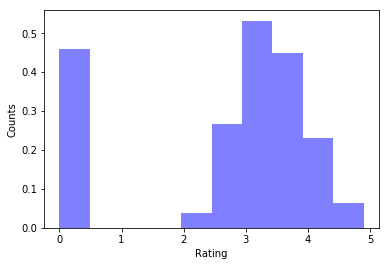

In [17]:
num_bins = 10
plt.hist(df['Aggregate rating'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.show()


<h3>Histogram of Number of votes</h3>

From the below histogram, we can say that majority of votes are between 0-1000 and few between 1000-2000

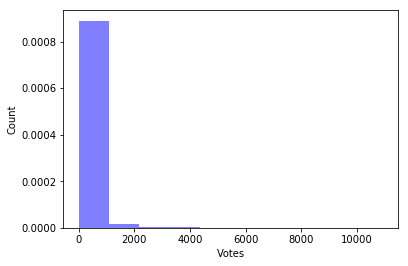

In [58]:
num_bins = 10
plt.hist(df['Votes'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel("Votes")
plt.ylabel("Count")


plt.show()


<h3>HISTOGRAM OF DISTIBUTION OF RESTRAUNTS IN DIFFERENT COUNTRIES</h3> 

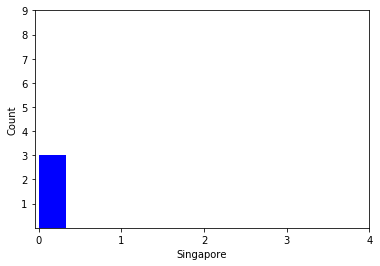

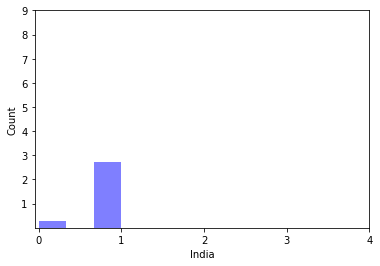

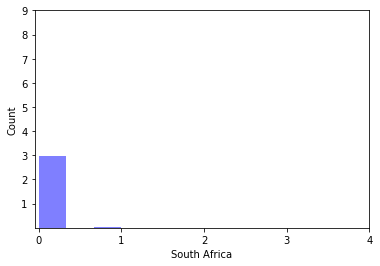

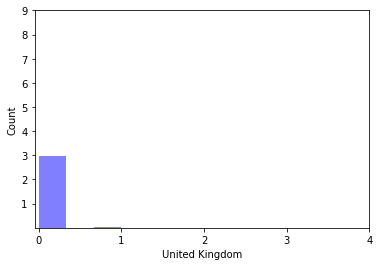

In [84]:
num_bins = 3
plt.hist(df['Singapore'], num_bins, normed=1, facecolor='blue')
plt.xlabel("Singapore")
plt.ylabel("Count")
plt.xticks(range(0, 5))
plt.yticks(range(1, 10))
plt.show()

num_bins = 3
plt.hist(df['India'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel("India")
plt.ylabel("Count")
plt.xticks(range(0, 5))
plt.yticks(range(1, 10))
plt.show()

num_bins = 3
plt.hist(df['South Africa'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel("South Africa")
plt.ylabel("Count")
plt.xticks(range(0, 5))
plt.yticks(range(1, 10))
plt.show()


num_bins = 3
plt.hist(df['United Kingdom'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.xlabel("United Kingdom")
plt.ylabel("Count")
plt.xticks(range(0, 5))
plt.yticks(range(1, 10))
plt.show()


The above histograms show the distribution of restaraunts in various countries like UK, South Africa, India, Singapore. As we can see maximum number of  restraunts are in India

<h3>SWARM PLOTS</h3>

In [141]:
 import seaborn as sns
fig1 = plt.figure(1, figsize=(9, 6))
data_to_plot = df['Votes']

ax = fig.add_subplot(111)

bp = ax.boxplot(data_to_plot)

fig1.savefig('fig1.png', bbox_inches='tight')


<h3>III. HYPOTHESIS TESTING</h3>

H0: These is no correlation between aggregate rating and number of votes

H1: there is  correlation between and number of votes

For exploring the relation, I develop a scatter plot. From the scatterplot, I can say that there is a positive correlation between Aggregate rating and number of votes. We can conclude this logically also, as greater the number of votes, greater the rating. 
From the scatterplot, we can also observe  that majority of votes are between 0-2000. Additionally, aggregate rating is between 2-5. Thus, our null hypothesis is rejected. I also make a second scatter plot for relation between aggregate rating and online delivery. There is a weak relation between those two. From the scatterplot, we can also observe  that majority of votes are between 0-2000. Additionally, aggregate rating is between 2-5. Thus, our null hypothesis is rejected. I also make a second scatter plot for relation between aggregate rating and online delivery. There is a weak relation between those two. 

We can derive more relationships between average rating and other parameters on the basis of Linear regression Model



<h3>SCATTER PLOT</h3>

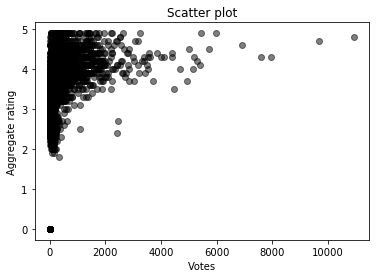

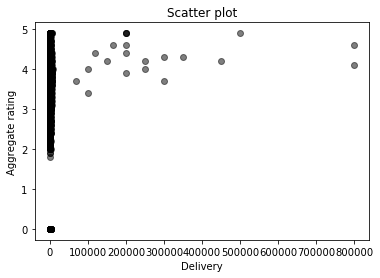

In [73]:
x = df['Votes']
y =df['Aggregate rating']
colors = (0,0,0)
plt.scatter(x, y,  c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Votes')
plt.ylabel('Aggregate rating')
plt.show()

x = df['Average Cost for two']
y =df['Aggregate rating']
colors = (0,0,0)
plt.scatter(x, y,  c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Delivery')
plt.ylabel('Aggregate rating')
plt.show()

<h3>LASSO REGRESSION FOR FEATURE SELECTION</h3>

In [136]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt 
lasso = Lasso(alpha=0.3, normalize=True)

lasso.fit(X_test,y_test)

lasso_coef = lasso.coef_
print(lasso_coef)


[ 0.  0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


As shown, Lasso regression don't help much to decide which are the best coeff. So I rely on Scatterplots. I was able to select best dimensions from ridge regression. however, it stopped working unexpectedly

<h3>MODEL IMPLEMENTATION</h3>

Based on the results from the above scatterplot, I develop a linear regression model to further further explore relationship between ratings and other variables in the model. 
I want to analyze what factors can affect rating of a restraunt. For this, I develop Multiple regresssion model. My Y variable is Aggregate rating and my Xs are 'Average Cost for two','yesonlinedelivery','Votes','yesdelivery','Hastable','yesorder','Price range', 'India','Australia','Brazil','Canada','Indonesia','Botswana','Qatar','Singapore','UAE','United Kingdom','United States'
To select the best parameters I had performed Lasso regression, however I got weird results fromthose.

<h3>LINEAR REGRESSION</h3>

Using linear regression, I find the predicted values of aggregated rating. My R2 is 32%, this means that I can find aggregated rating with an accuracy of 32 %. 
The Mean Squared error is 0.68. This error was reduced after data was scaled from 0.97 to 0.68.

Zomato can use this model to identify which factors help restaurants get good rating. It can identify the most important and least important factors as per the results of the regression model. Based on the results, it can help restauraunts get better ratings and increase their poularity.

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

X = df[['Average Cost for two','yesonlinedelivery','Votes','yesdelivery','Hastable','yesorder','Price range', 'India','Australia','Brazil','Canada','Indonesia','Botswana','Qatar','Singapore','UAE','United Kingdom','United States']]
y = df[['Aggregate rating']]
X = scale(X)
y = scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=31)
reg_all = LinearRegression()

reg_all.fit(X_train, y_train)
# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print("R^2: {}".format(reg_all.score(X_test, y_test)))



0.689053456925
0.68991745471
R^2: 0.32380500284983926


<h2>KNN CLASSIFICATION</h2>

Since, the linear regression's accuracy is low, maybe this data is better suited for some other type of model. To get a better accuracy of than linear regression, I perform KNN classification. In KNN classification, I classify data into the rating labels (such as Excellent, Average, Good, Very good ). From these results, average has the best precision and recall values

The classification report shows that the accuracy of the data is as high as 71%.From the results we can see that average has the best precision and recall values. Thus, this data is better suited for KNN classification than linear regression.

Using these results, Zomato can recommend good eating options to its users 

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize  KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 6)
X = df[['Average Cost for two','Votes','Price range','Aggregate rating','Longitude','Latitude']]
y = df[['Rating text']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=31)

# Fit 
knn = knn.fit(X_train, y_train)

# Predict
y_prediction = knn.predict(X_test)

# Classification Report 
print(classification_report(y_test, y_prediction))
print(knn.score(X_test, y_test))


             precision    recall  f1-score   support

    Average       0.74      0.87      0.80      1112
  Excellent       0.38      0.21      0.27       104
       Good       0.48      0.49      0.49       601
  Not rated       1.00      0.98      0.99       659
       Poor       0.00      0.00      0.00        50
  Very Good       0.46      0.31      0.37       340

avg / total       0.69      0.71      0.69      2866

0.712491277041


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


<h2>LOGISTIC REGRESSSION</h2>


To further increase the accuracy, I perform the logistic regression model. For the logistic regression,I check how much data falls in the excellent category. The accuracy of the logistic regression is as high as 97%. Thus, this model is best suited for this data. 

Zomato can use this model to find best restaurants on its site and recommend users good eating options.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
dummy8 = pd.get_dummies(df['Rating text'])
df = pd.concat([df,dummy8],axis =1)



In [35]:

X = df[['Average Cost for two','Votes','Price range','Aggregate rating']]
y = df[['Excellent']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3703    3]
 [ 110    5]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3706
          1       0.62      0.04      0.08       115

avg / total       0.96      0.97      0.96      3821



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the above logistic regression model is 97%. Thus, this data is best suited for logistic regression.

<h1>CONCLUSION</h1>
I develop 3 models in the my project namely Linear regression (accuracy =32 percent), Logistic regression (Accuracy =97 percent), and KNN classification (accuracy =71 percent)

From the above analysis, we can conclude that this data is best suited for logistic regression. 
From logistic regression, we can classify restaurants which get excellent ratings and which fail to fall into that category. Zomato can advertise high ratings restaurants more often to increase its revenue. Zomato can also shows these high rating restaurants on the top of user search results.

Other models like linear regression can also be helpful. The linear regression model helps to predict the ratings of the restaraunts. It also helps to identify what factors affect ratings. Zomato can identify how ratings change as per the online delivery options, pre booking options, countries, and so on. This analysis can then help restaraunts to increase their ratings. 
For example, if online booking increases restaraunt ratings, more restraunts can try that. Further, a relation between type of cuisne and rating can also be determined. Similar analysis can help restraunts to increase their ratings and further increase there revenue and sales.

Finally, KNN Classification helps to classify restaurants into categories of good, average, excellent, bad, very good, etc. With help of this data, zomato can identify the best restaurants on its site and poor restaurants on its site. This analysis can help Zomato to give accurate search results to user queries and do better analysis.

All this analysis can help zomato identify popularity of is restraunts geographically and on other factors. Further, we can also identify some patterns in the data by means of unsupervised learning which can again help Zomato with their analysis. Consequently, they can boost their revenue as per their popularity.

